# Analysis on Donald Trump's Tweets

## Download Tweets

The project uses NLTK and Twitter API

In [25]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [14]:
#All the packages we are using in this project
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk import FreqDist
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import json
import pandas as pd
import csv

#Variables that contains the user credentials to access Twitter API
access_token = "4766120068-iPVIiQZ9TAe36FY6rMMJfUGJaceqVweJ8Rbj5yT"
access_token_secret = "28rHUIiW1A58VNxdaFHlOWNB6O3htGRs2OKo1NgwM3nzw"
consumer_key = "6NkPkqdfSrVot7noRwrbdB0xc"
consumer_secret = "iw3lSXqetEOCpjI4vGFSQpWEqC7dlqyvkUKm6DaOVXlZC9F3wF"

#setup OAuth handler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [15]:
def get_user_tweets(name, api):
    tweets = []
    new_tweets = api.user_timeline(name, count=200)
    tweets.extend(new_tweets)
    oldest = tweets[-1].id - 1
    
    while len(new_tweets) > 0:
        print("fetching tweets before %s" % (oldest))
        new_tweets = api.user_timeline(name, count=200, max_id = oldest)
        tweets.extend(new_tweets)
        oldest = tweets[-1].id - 1
        print("%s tweets downloaded so far" % (len(tweets)))
    out = [tweet.text for tweet in tweets]
    return out

In [16]:
out = get_user_tweets("realDonaldTrump", api)

getting tweets before 900708110330978303
400 tweets downloaded so far
getting tweets before 891996053611917311
600 tweets downloaded so far
getting tweets before 883012994145279999
800 tweets downloaded so far
getting tweets before 873131235614347263
1000 tweets downloaded so far
getting tweets before 858343980823703552
1200 tweets downloaded so far
getting tweets before 843776582825267200
1400 tweets downloaded so far
getting tweets before 828375073006444543
1600 tweets downloaded so far
getting tweets before 817336355193753599
1800 tweets downloaded so far
getting tweets before 803434300846862335
1999 tweets downloaded so far
getting tweets before 792176856086622207
2199 tweets downloaded so far
getting tweets before 788876733332062207
2399 tweets downloaded so far
getting tweets before 785102728334893055
2599 tweets downloaded so far
getting tweets before 779638140810194943
2799 tweets downloaded so far
getting tweets before 771145576381427711
2999 tweets downloaded so far
getting t

In [17]:
name = "realDonaldTrump" ## tweeter name is @realDonaldTrump
file_path = '%s_tweets.txt' % (name)

#write csv
with open(file_path, 'w') as f:
    for tweet in out:
        f.write(tweet + "\n")

All tweets from Donald Trump are stored in file 'realDonaldTrump_tweets.txt' in the current directory

## Text Analysis
- Text collocations to find common words that go together
- Regular expression to parse out hashtags and high frequent user account

First we uses Regular expression to strip away symbols and web links in the tweets

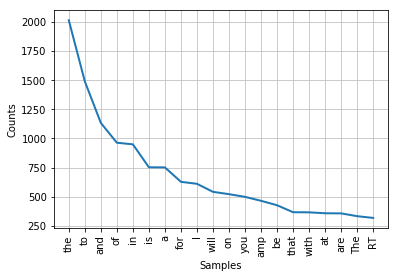

In [52]:
with open(file_path, 'r') as f:
    raw = re.sub(r'[^\w]|https.*\b', ' ', f.read())
    tokens = word_tokenize(raw)
    freqDist = nltk.FreqDist(tokens)
freqDist.plot(20)

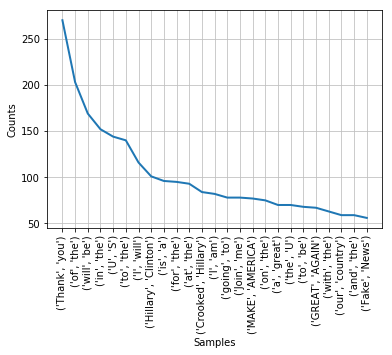

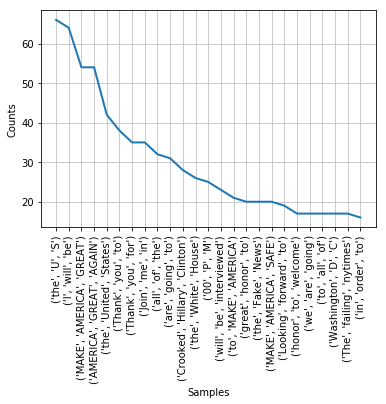

In [55]:
from nltk.util import ngrams

def plot_ngram(tokens, num):
    ngram = ngrams(tokens, num)
    ngram_dist = nltk.FreqDist(ngram)
    ngram_dist.plot(25)

plot_ngram(tokens, 2) ##bigram frequency distribution
plot_ngram(tokens, 3) ##trigram frequency distribution

In [57]:
print("Unique trump tweet vocab: %i (including capitalized letters)" % len(set(tokens)))

Unique trump tweet vocab: 7965 (including capitalized letters)


In [19]:
text = nltk.Text(tokens)
text.collocations()

MAKE AMERICA; Hillary Clinton; Crooked Hillary; Fake News; United
States; AMERICA GREAT; White House; North Korea; FAKE NEWS; Prime
Minister; last night; North Carolina; Looking forward; Bernie Sanders;
Republican Senators; great honor; New Hampshire; law enforcement;
Stock Market; AMERICA SAFE


Here we can see that "Crooked Hillary", "FAKE NEWS" are all the slogans that Trump frequently uses in his campaign. 

In [30]:
from operator import itemgetter
hashtags = re.findall(r"#(\w+)", raw)
freqDist_hashtags = nltk.FreqDist(hashtags)
hashtags = []
for freq in freqDist_hashtags.keys():
    hashtags.append((freq, freqDist_hashtags[freq]))
sorted_hashtags = sorted(hashtags, key=itemgetter(1), reverse=True) #Sort by frequency

#find the top 50 most used hashtags by Donald Trump
print([text[0] for text in sorted_hashtags[:50]])

['MAGA', 'DrainTheSwamp', 'MakeAmericaGreatAgain', 'BigLeagueTruth', 'AmericaFirst', 'ImWithYou', 'Debate', 'CrookedHillary', 'ICYMI', 'TrumpPence16', 'Debates2016', 'VPDebate', 'Obamacare', 'Debates', 'USA', 'ThankYouTour2016', 'HurricaneHarvey', 'TrumpTrain', 'debate', 'DebateNight', 'FakeNews', 'VoteTrumpPence16', 'ObamacareFail', 'Harvey', 'LESM', 'USWomensOpen', 'WeeklyAddress', 'NeverHillary', 'KatesLaw', 'VoteTrump', 'TrumpRally', 'UNGA', 'Fake', 'G20Summit', 'POTUSAbroad', '1', '2A', 'MakeAmericaSafeAgain', 'USAatUNGA', 'NeverForget', 'HurricaneIrma', 'LaborDay', 'GodBlessTheUSA', 'ISIS', 'NoSanctuaryForCriminalsAct', 'Hannity', 'NATO', 'PEOTUS', 'ElectionDay', 'PayToPlay']


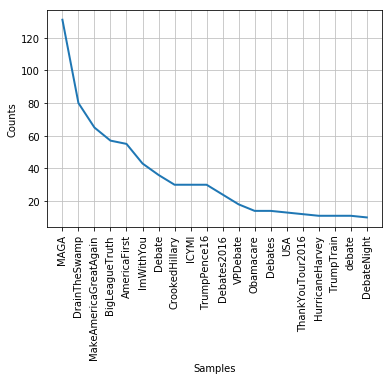

In [28]:
freqDist_hashtags.plot(20)

#### Hashtags have shown Trump's brilliance in marketing himself and bashing his opponents

## How frequent are individual accounts get addressed in Trump's tweets?

First I use regular expression to parse out all the @ symbol in his tweets

In [33]:
tag_users = re.findall(r"@(\w+)", raw)
freq_users = nltk.FreqDist(tag_users)
tag_users = []
for freq in freq_users.keys():
    tag_users.append((freq, freq_users[freq]))
tag_users = sorted(tag_users, key=itemgetter(1), reverse=True) #Sort by frequency

print([text[0] for text in tag_users[:50]])

['realDonaldTrump', 'foxandfriends', 'TeamTrump', 'FoxNews', 'CNN', 'HillaryClinton', 'nytimes', 'WhiteHouse', 'mike_pence', 'POTUS', 'IvankaTrump', 'FLOTUS', 'VP', 'DanScavino', 'DRUDGE_REPORT', 'EricTrump', 'DonaldJTrumpJr', 'Mike_Pence', 'timkaine', 'oreillyfactor', 'KellyannePolls', 'seanhannity', 'GOP', 'jessebwatters', 'Morning_Joe', 'NBCNews', 'EmmanuelMacron', 'Team_Trump45', 'washingtonpost', 'Scavino45', 'USNavy', 'Reince', 'foxnation', 'RealDonaldTrump', 'Netanyahu', 'LouDobbs', 'DHSgov', 'FoxBusiness', 'JudgeJeanine', 'USGA', 'DiamondandSilk', 'ABC', 'SeanHannity', 'jeffzeleny', 'morningmika', 'ericbolling', 'SecShulkin', 'TheFive', 'JacobAWohl', 'narendramodi']


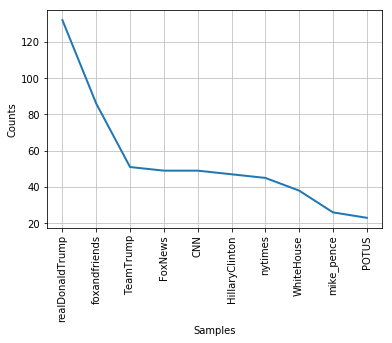

In [34]:
freq_users.plot(10)

#### Here we can see that news outlets are most frequently mentioned in Trump's tweets

## Conclusion:
Trump's tweets have directly manifested his ideology. By looking at bigram frequency distribution, we can learn that Trump not only like to bash his opponents, but also frequently give himself the credits.  